In [45]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Reading data from remote link
df = "http://bit.ly/w-data"
df = pd.read_csv(df)

df.head(10)

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25

In [4]:
df.shape

(25, 2)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()


Hours     0
Scores    0
dtype: int64

In [19]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x1d882827070>,
 'caps': [<matplotlib.lines.Line2D at 0x1d882827610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d882818d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1d882827bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d882827e80>],
 'means': []}

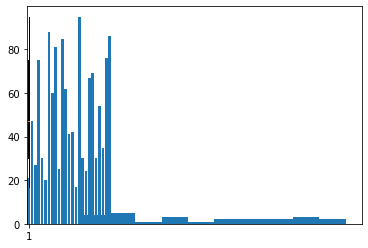

In [22]:
plt.bar(height = df.Scores, x = np.arange(1, 26, 1))
plt.hist(df.Scores) #histogram
plt.boxplot(df.Scores) #boxplot

In [23]:
plt.bar(height = df.Hours, x = np.arange(1, 26, 1))
plt.hist(df.Hours) #histogram
plt.boxplot(df.Hours) #boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8828c3a60>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8828d1040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8828c3790>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8828d15e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8828d18b0>],
 'means': []}

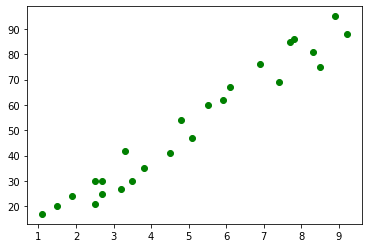

In [25]:
# Scatter plot
plt.scatter(x = df['Hours'], y = df['Scores'], color = 'green')

In [10]:
df['Hours'].value_counts().plot(kind='bar')


<AxesSubplot:>

<AxesSubplot:>

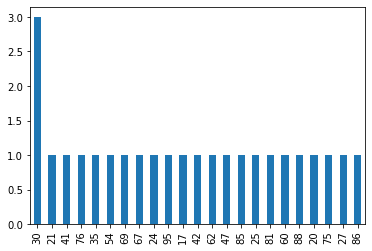

In [11]:
df['Scores'].value_counts().plot(kind='bar')


In [12]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 



Training complete.


In [37]:
pred_y = regressor.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

Hours  Predicted Marks
0    1.5        16.884145
1    3.2        33.732261
2    7.4        75.357018
3    2.5        26.794801
4    5.9        60.491033

In [40]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare_scores

Actual Marks  Predicted Marks
0            20        16.884145
1            27        33.732261
2            69        75.357018
3            30        26.794801
4            62        60.491033

In [42]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [47]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.183859899002975


In [48]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692
